In [61]:
import copy
import sys
sys.path.insert(0, "../../")
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_file_handler import Atom_File_handler
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Animator, Atom_Collection_Plotter
from classes.calculators.lennardjones import LJGauss
from classes.optimizers.random_struct_search import Line_searcher1
from classes.optimizers.md_simulator1 import MDT_simulator
import numpy as np
import matplotlib.pyplot as plt

In [62]:
class Atom_plotter(Animator):
    def __init__(self, default_cols=("C0", "C1"), markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)

In [63]:
def make_random_conf(N_atoms=12, unit_cell=(np.array([10.0,0.0]), np.array([0.0,10.0])), pbc=True):
    random_poses = np.random.randn(N_atoms,2)+ (5,5) #np.random.rand(N_atoms, 2)*np.linalg.norm(unit_cell[0])
    atomlist = [Atom(position=pos) for pos in random_poses]
    atom_col = Atom_Collection(atomlist=atomlist, unit_cell=unit_cell, pbc=pbc)
    atom_col.calculator = LJGauss()
    return atom_col

atom_writer = Atom_File_handler()

opt_cols = []
for i in range(2):
    opt_cols =  []
    for j in range(100):
        optimizer = Line_searcher1(atom_col=make_random_conf())
        optimizer.run(track=False)
        opt_cols.append(optimizer.best_atom_col)
    atom_writer.save_atom_collections(atom_cols=opt_cols, filename=f"relaxed_structs{i}")
    

KeyboardInterrupt: 

In [ ]:
class MD_optimizer():
    def __init__(self) -> None:
        pass

Text(0.5, 1.0, '-2.189')

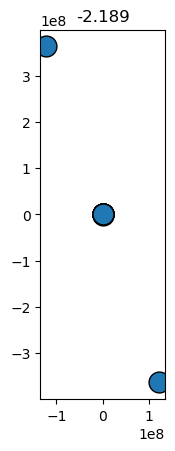

In [80]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
#ax.set_xlim([-2.0, 12.0])
#ax.set_ylim([-2.0, 12.0])

optimizer = MDT_simulator(atom_col=make_random_conf(), temp=0.05)
for temp in [2.0, 1.0, 0.5, 0.05]:
    optimizer.temp = temp
    optimizer.run_MDsimulation(N_steps=10)
optimizer = Line_searcher1(atom_col=optimizer.logged_atom_cols[-1])
optimizer.run(N_max=0)
atom_plotter = Atom_plotter(markersize=15)
atom_plotter(optimizer.best_atom_col, ax=ax)
optimizer.best_atom_col.reset_plot_axes()
ax.set_title(round(optimizer.best_atom_col.get_potential_energy(),3))